<a href="https://colab.research.google.com/github/Rafaelpecan/MNIST/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Usando modelo convencional (Dense):

In [25]:
import keras
from keras.models import Sequential, Model,load_model
from keras import backend as K
from keras.layers.core import Dense, Activation
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications.mobilenet import MobileNet
from keras.applications.mobilenet import preprocess_input
from keras.applications.vgg16 import VGG16
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras import backend as K
import numpy as np
from IPython.display import Image
from keras.layers.core import Flatten, Dense, Dropout
from sklearn.utils import shuffle
import matplotlib.pylab as plt
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
# Visualização
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import pandas as pd

In [2]:
mnist = fetch_openml('mnist_784', cache=False)

In [3]:
mnist.data.shape

(70000, 784)

In [4]:
X = mnist.data.astype('float32').values
y = mnist.target.astype('int64').values

In [5]:
X /= 255.0

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [7]:
X_train.shape, y_train.shape

((52500, 784), (52500,))

In [22]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_train = to_categorical(y_train, 10)
y_test = le.fit_transform(y_test)
y_test = to_categorical(y_test, 10)

In [9]:
y_train.shape, y_test.shape

((52500, 10), (17500, 10))

In [10]:
# criando a Rede

model = Sequential()
model.add(Dense(512, input_shape=(784,), activation="relu"))
model.add(Dense(12, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(10, activation="softmax"))
model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=["accuracy"])
H = model.fit(X_train, y_train, batch_size=30, epochs=20, verbose=2, validation_data=(X_test, y_test))

Epoch 1/20
1750/1750 - 9s - loss: 0.4595 - accuracy: 0.8521 - val_loss: 0.1459 - val_accuracy: 0.9611 - 9s/epoch - 5ms/step
Epoch 2/20
1750/1750 - 8s - loss: 0.2290 - accuracy: 0.9254 - val_loss: 0.1210 - val_accuracy: 0.9645 - 8s/epoch - 4ms/step
Epoch 3/20
1750/1750 - 8s - loss: 0.1776 - accuracy: 0.9410 - val_loss: 0.1084 - val_accuracy: 0.9707 - 8s/epoch - 4ms/step
Epoch 4/20
1750/1750 - 10s - loss: 0.1495 - accuracy: 0.9503 - val_loss: 0.0959 - val_accuracy: 0.9745 - 10s/epoch - 6ms/step
Epoch 5/20
1750/1750 - 8s - loss: 0.1237 - accuracy: 0.9583 - val_loss: 0.0980 - val_accuracy: 0.9757 - 8s/epoch - 5ms/step
Epoch 6/20
1750/1750 - 9s - loss: 0.1129 - accuracy: 0.9611 - val_loss: 0.1015 - val_accuracy: 0.9755 - 9s/epoch - 5ms/step
Epoch 7/20
1750/1750 - 12s - loss: 0.0949 - accuracy: 0.9676 - val_loss: 0.1078 - val_accuracy: 0.9755 - 12s/epoch - 7ms/step
Epoch 8/20
1750/1750 - 11s - loss: 0.0803 - accuracy: 0.9730 - val_loss: 0.1101 - val_accuracy: 0.9775 - 11s/epoch - 7ms/step
Ep

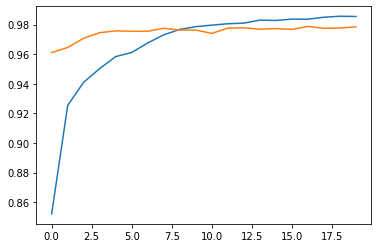

In [11]:
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])

In [12]:
Y_pred = model.predict(X_test)

547/547 [==============================] - 1s 2ms/step


In [13]:
Y_pred.argmax(axis=1)
y_test.argmax(axis=1)

array([8, 4, 8, ..., 5, 8, 2])

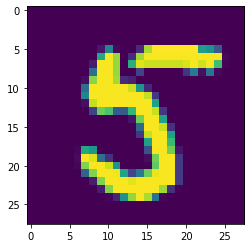

5

In [14]:
plt.imshow(X_test[15].reshape(28, 28), interpolation='nearest')
plt.show()
Y_pred[15].argmax()

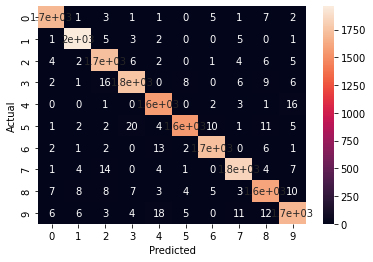

In [15]:
data = {'y_Actual':    y_test.argmax(axis=1),
        'y_Predicted': Y_pred.argmax(axis=1)
        }

conf = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])

confusion_matrix = pd.crosstab(conf['y_Actual'], conf['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True)
plt.show()

In [16]:
data

{'y_Actual': array([8, 4, 8, ..., 5, 8, 2]),
 'y_Predicted': array([8, 4, 8, ..., 5, 8, 2])}

### *Usando* convnets:


In [18]:
Xc = X.reshape(-1, 28, 28)

In [19]:
Xc.shape

(70000, 28, 28)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(Xc, y, test_size=0.25, random_state=42)

In [ ]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_train = to_categorical(y_train, 10)
y_test = le.fit_transform(y_test)
y_test = to_categorical(y_test, 10)

In [37]:
X_train.shape, X_test.shape

((52500, 28, 28), (17500, 28, 28))

In [28]:
#primeira camada conv

modelConv = Sequential()
modelConv.add(Conv2D(20, 5, padding="same", input_shape=(28,28, 1)))
modelConv.add(Activation("relu"))
modelConv.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

In [31]:
#segunda camada conv

modelConv.add(Conv2D(50, 5, padding="same"))
modelConv.add(Activation("relu"))
modelConv.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

In [33]:
#camada dense

modelConv.add(Flatten())
modelConv.add(Dense(512, activation="relu"))
modelConv.add(Dense(12, activation="relu"))
modelConv.add(Dropout(0.2))
modelConv.add(Dense(10, activation="softmax"))

In [ ]:
modelConv.summary()

In [39]:
modelConv.compile(optimizer='adam', loss="categorical_crossentropy", metrics=["accuracy"])
Hconv = modelConv.fit(X_train, y_train, batch_size=30, epochs=20, verbose=2, validation_data=(X_test, y_test))

Epoch 1/20
1750/1750 - 130s - loss: 0.3898 - accuracy: 0.8640 - val_loss: 0.0737 - val_accuracy: 0.9823 - 130s/epoch - 74ms/step
Epoch 2/20
1750/1750 - 106s - loss: 0.1402 - accuracy: 0.9573 - val_loss: 0.0572 - val_accuracy: 0.9843 - 106s/epoch - 60ms/step
Epoch 3/20
1750/1750 - 105s - loss: 0.1057 - accuracy: 0.9651 - val_loss: 0.0473 - val_accuracy: 0.9887 - 105s/epoch - 60ms/step
Epoch 4/20
1750/1750 - 110s - loss: 0.0912 - accuracy: 0.9694 - val_loss: 0.0660 - val_accuracy: 0.9864 - 110s/epoch - 63ms/step
Epoch 5/20
1750/1750 - 106s - loss: 0.0807 - accuracy: 0.9739 - val_loss: 0.0590 - val_accuracy: 0.9890 - 106s/epoch - 61ms/step
Epoch 6/20
1750/1750 - 103s - loss: 0.0587 - accuracy: 0.9817 - val_loss: 0.0532 - val_accuracy: 0.9904 - 103s/epoch - 59ms/step
Epoch 7/20
1750/1750 - 105s - loss: 0.0554 - accuracy: 0.9837 - val_loss: 0.0464 - val_accuracy: 0.9896 - 105s/epoch - 60ms/step
Epoch 8/20
1750/1750 - 103s - loss: 0.0480 - accuracy: 0.9858 - val_loss: 0.0512 - val_accuracy: 

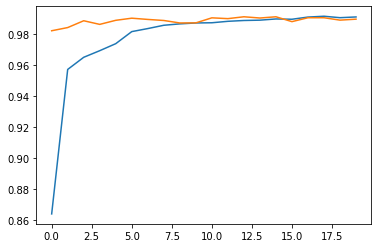

In [42]:
plt.plot(Hconv.history['accuracy'])
plt.plot(Hconv.history['val_accuracy'])

In [43]:
aug = ImageDataGenerator(
rotation_range=20,
zoom_range=0.15,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.15,
horizontal_flip=True,
fill_mode="nearest")

In [45]:
X_train = X_train.reshape(-1,28,28,1)

In [47]:
X_train.shape

(52500, 28, 28, 1)

In [48]:
H3 = modelConv.fit(x=aug.flow(X_train, y_train, batch_size=30), validation_data=(X_test, y_test), steps_per_epoch=len(X_train) / 30, epochs=20)

Epoch 1/20
1750/1750 [==============================] - 131s 75ms/step - loss: 0.8599 - accuracy: 0.7322 - val_loss: 0.1102 - val_accuracy: 0.9683
Epoch 2/20
1750/1750 [==============================] - 130s 74ms/step - loss: 0.3834 - accuracy: 0.8853 - val_loss: 0.0809 - val_accuracy: 0.9772
Epoch 3/20
1750/1750 [==============================] - 129s 74ms/step - loss: 0.3058 - accuracy: 0.9084 - val_loss: 0.0967 - val_accuracy: 0.9741
Epoch 4/20
1750/1750 [==============================] - 129s 74ms/step - loss: 0.2681 - accuracy: 0.9221 - val_loss: 0.1026 - val_accuracy: 0.9719
Epoch 5/20
1750/1750 [==============================] - 128s 73ms/step - loss: 0.2434 - accuracy: 0.9284 - val_loss: 0.0838 - val_accuracy: 0.9763
Epoch 6/20
1750/1750 [==============================] - 128s 73ms/step - loss: 0.2308 - accuracy: 0.9336 - val_loss: 0.0789 - val_accuracy: 0.9778
Epoch 7/20
1750/1750 [==============================] - 129s 74ms/step - loss: 0.2104 - accuracy: 0.9394 - val_loss: 0

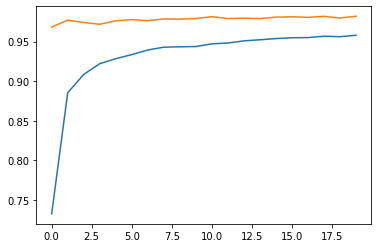

In [49]:
plt.plot(H3.history['accuracy'])
plt.plot(H3.history['val_accuracy'])